In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from scipy.stats import binom
import matplotlib.ticker as mtick

In [2]:
adj = 0.95
out = 'multi_reporters.pdf'

f1 = np.logspace(-1, -6, num=1000)
r1 = [(16, 'Memory CD4'), (23, 'Mono'), (29, 'Naive CD4'), (31, 'Memory CD8'), (47, 'Naive CD8'), (100, 'DC'), (110, 'Naive B'), (216, 'NK'), (340, 'Memory B')]
min_reporters = [1, 2, 3, 4, 5,6]
d1 = 30

len(r1)

9

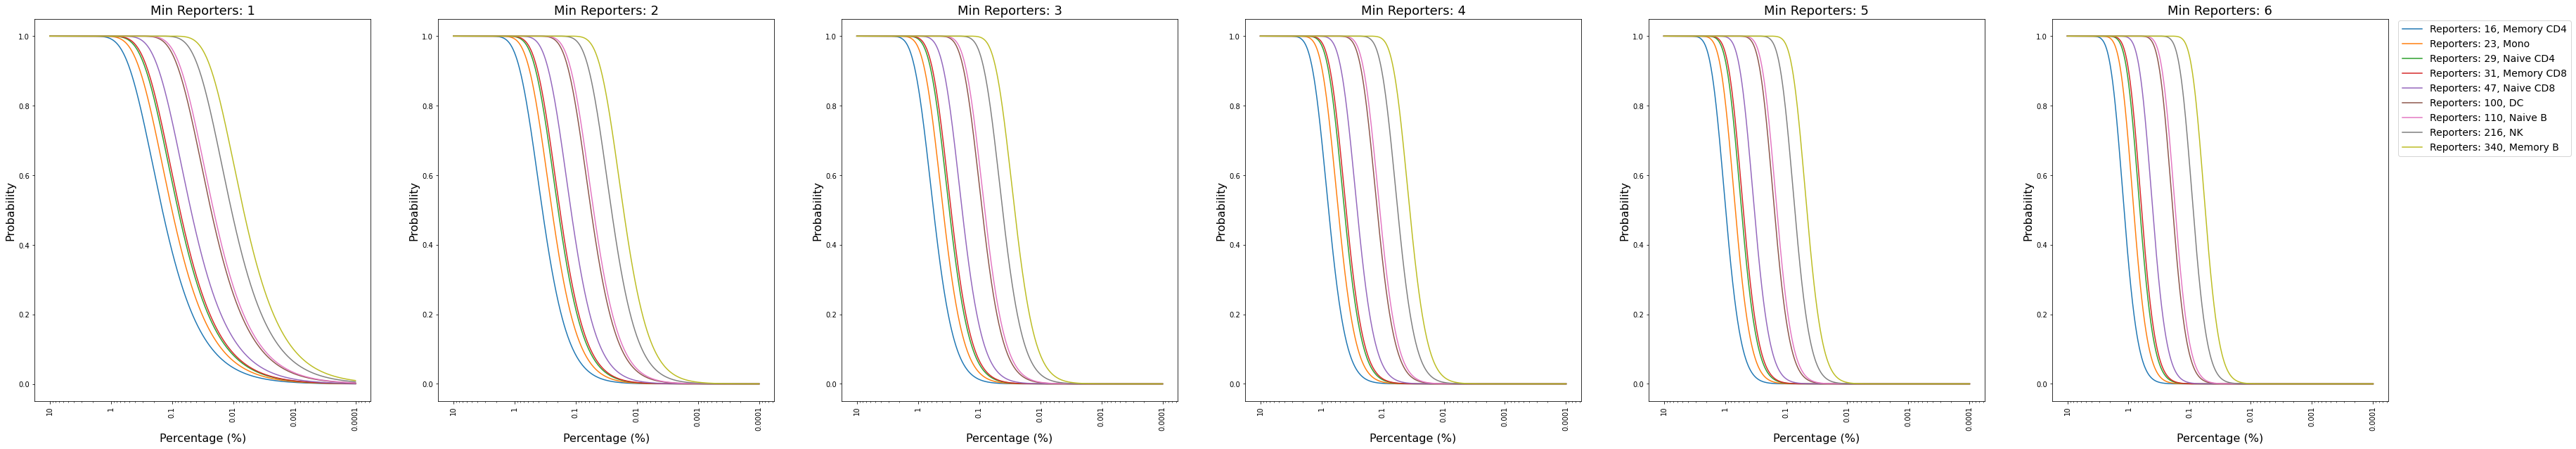

In [3]:
fig, axs = plt.subplots(1, len(min_reporters), figsize=(len(min_reporters) * 10, 10))
df_out = pd.DataFrame()
df_out['Fraction'] = f1

for j in range(len(min_reporters)):
    for i in range(len(r1)):
        prob = 1 - binom.cdf(min_reporters[j] - 1, d1 * r1[i][0], f1)
        name = 'Reporters: ' + str(r1[i][0]) + ', ' + str(r1[i][1])
        axs[j].plot(f1 * 100, prob, label=name)
        df_out[name + '| Min Reporters: ' + str(min_reporters[j])] = prob
        # axs[j].fill_between(f1, prob(f1, r1[i][0], d1 - d_range1), prob(f1, r1[i][0], d1 + d_range1), alpha=0.2)

    axs[j].set_xlabel('Percentage (%)', fontsize=16)
    axs[j].set_ylabel('Probability', fontsize=16)
    axs[j].set_xscale('log')
    axs[j].xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
    axs[j].invert_xaxis()
    axs[j].set_title('Min Reporters: ' + str(min_reporters[j]), fontsize=18)
    axs[j].tick_params(axis='x', labelrotation=90)

axs[len(min_reporters) - 1].legend(fontsize=14, loc=(1.03, 0.64))
fig.savefig(out,dpi=300, bbox_inches='tight')